<h1>Guessed Artist!<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introducción" data-toc-modified-id="Introducción-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introducción</a></span><ul class="toc-item"><li><span><a href="#Motivación" data-toc-modified-id="Motivación-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Motivación</a></span></li><li><span><a href="#Los-datos" data-toc-modified-id="Los-datos-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Los datos</a></span></li><li><span><a href="#Las-herramientas" data-toc-modified-id="Las-herramientas-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Las herramientas</a></span></li></ul></li><li><span><a href="#Manos-a-la-obra" data-toc-modified-id="Manos-a-la-obra-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Manos a la obra</a></span><ul class="toc-item"><li><span><a href="#Inicializaciones" data-toc-modified-id="Inicializaciones-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Inicializaciones</a></span></li><li><span><a href="#Obtención-de-los-datos" data-toc-modified-id="Obtención-de-los-datos-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Obtención de los datos</a></span></li></ul></li><li><span><a href="#Clasificador-de-estilos-(v1)" data-toc-modified-id="Clasificador-de-estilos-(v1)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Clasificador de estilos (v1)</a></span><ul class="toc-item"><li><span><a href="#Preprocesado-de-los-datos" data-toc-modified-id="Preprocesado-de-los-datos-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Preprocesado de los datos</a></span></li><li><span><a href="#Modelo-basado-en-ResNet-50" data-toc-modified-id="Modelo-basado-en-ResNet-50-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Modelo basado en ResNet-50</a></span></li><li><span><a href="#Resultados" data-toc-modified-id="Resultados-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Resultados</a></span></li></ul></li><li><span><a href="#Reconocimiento-del-autor-de-la-obra" data-toc-modified-id="Reconocimiento-del-autor-de-la-obra-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Reconocimiento del autor de la obra</a></span><ul class="toc-item"><li><span><a href="#Preprocesado-de-los-datos" data-toc-modified-id="Preprocesado-de-los-datos-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Preprocesado de los datos</a></span></li><li><span><a href="#Modelo-basado-en-ResNet-34" data-toc-modified-id="Modelo-basado-en-ResNet-34-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Modelo basado en ResNet-34</a></span></li><li><span><a href="#Modelo-basado-en-ResNet-50" data-toc-modified-id="Modelo-basado-en-ResNet-50-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Modelo basado en ResNet-50</a></span></li><li><span><a href="#Resultados" data-toc-modified-id="Resultados-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Resultados</a></span></li></ul></li><li><span><a href="#Monet-o-Boudin?" data-toc-modified-id="Monet-o-Boudin?-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Monet o Boudin?</a></span></li><li><span><a href="#Conclusiones" data-toc-modified-id="Conclusiones-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusiones</a></span></li><li><span><a href="#Futuras-líneas-de-trabajo" data-toc-modified-id="Futuras-líneas-de-trabajo-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Futuras líneas de trabajo</a></span></li></ul></div>

**Guessed Artist!** - Un proyecto sencillo para la clasificación de obras de arte usando Deep Learning 

## Introducción

### Motivación

Hace unos meses tuve la suerte de visitar una [exposición](https://www.museothyssen.org/exposiciones/monetboudin) conjunta sobre [Claude Monet](https://www.wikiart.org/es/claude-monet) y [Eugène Boudin](https://www.wikiart.org/es/eugene-boudin). El primero, máximo exponente del *Impresionismo*, es uno de mis pintores favoritos (incluso le copié algún cuadro cuando era un chaval); pero sorprendentemente no conocía nada del segundo. Resulta que Monet fue *discípulo* de Boudin (empezó a pintar gracias a él), aunque acabó eclipsando totalmente a su maestro. Ambos mantuvieron una larga relación de amistad, desencuentros, y admiración mutua por encima de todo. 

En la exposición se podía comprobar la evolución de los dos pintores, desde un mismo punto de partida y misma temática, pero siguiendo distintos caminos, que con el tiempo volvieron a entrecruzarse. Resultado: una visita de casi 1 hora donde lo primero que hacías al ponerte delante de un nuevo cuadro era intentar adivinar su autor. ¡Pero no era nada sencillo!

Revisando la aplicación de redes neuronales convolucionales al reconocimiento de imágenes me vino a la cabeza aquella exposición. ¿Cómo de difícil resultaría para estas redes la tarea de distinguir el autor de un cuadro? ¿Será mucho más complicado que distinguir animales en fotografías? Vamos a comprobarlo :)

### Los datos

Para poder entrenar nuestra red neuronal necesitaremos las fotos de muchos cuadros. Por suerte contamos con un dataset de obras de arte recopilado de [WikiArt](http://www.wikiart.org/) para una [competición de Kaggle](https://www.kaggle.com/c/painter-by-numbers/overview). Las imágenes de este dataset tienen copyright, pero se permite su uso para la minería de datos. Cuenta con algo más de 100.000 pertenecientes a 2.300 artistas, cubriendo un montón de estilos y épocas. Cada imagen está etiquetada en un fichero csv que obtendremos aparte. 

**NOTA**: Por rendimiento usaremos una versión preprocesada del dataset, con imágenes más pequeñas obtenidas de [aquí](https://www.kaggle.com/c/painter-by-numbers/discussion/23099).

### Las herramientas

Para este pequeño proyecto vamos a utilizar la librería [fastai](https://docs.fast.ai/), que corre sobre [PyTorch](https://pytorch.org/). Fastai simplifica el entrenamiento de redes neuronales aplicando técnicas punteras de forma eficiente, y obteniendo resultados a la altura de los últimos avances en visión artificial, procesamiento del lenguaje natural, datos tabulares y filtrado colaborativo.

## Manos a la obra

### Inicializaciones

Dependiendo del entorno realizamos una inicialización previa:

In [0]:
%%capture
from notebook import notebookapp
server = list(notebookapp.list_running_servers())[0]

if server['hostname'] == 'localhost':
  # Local environment
  %reload_ext autoreload
  %autoreload 2
  %matplotlib inline
else:
  # Cloud
  !pip install git+https://github.com/fastai/fastai.git
  !curl https://course.fast.ai/setup/colab | bash

Hacemos los imports necesarios (el uso del asterisco no está recomendado pero es útil a la hora de probar una nueva librería).

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate
from fastai.utils.show_install import *
from shutil import copy, move

from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile

import pandas as pd
import numpy as np
import os
import requests
import json

np.random.seed(42)

In [0]:
# Show info about the environment. Useful when you are in Colab 
# and you wanna know if you were assigned the best GPU ;)
show_install()

### Obtención de los datos

Vamos a usar la versión *lite* del dataset original, que contiene todas las imágenes pero con un tamaño reducido, a sabiendas de que para entrenar nuestra red usaremos tamaños como 224x224 o 299x299 píxeles.

Las imágenes reducidas se encuentran en un [repositorio de github](https://github.com/zo7/painter-by-numbers/releases/), divididas entre un fichero comprimido con las imágenes de entrenamiento y otro con las de test. Descargaremos ambos, los descomprimiremos, y copiaremos todas las imágenes a una misma ubicación.

In [4]:
train_dir = untar_data('https://github.com/zo7/painter-by-numbers/releases/download/data-v1.0/train')
train_dir, len(train_dir.ls())

(PosixPath('/root/.fastai/data/train'), 79433)

In [0]:
base_dir = train_dir.parent
pictures_dir = base_dir/'pictures'
pictures_dir.mkdir(exist_ok=True)

In [6]:
for f in train_dir.ls():
    copy(f, pictures_dir)
len(pictures_dir.ls())

79433

In [7]:
test_dir = untar_data('https://github.com/zo7/painter-by-numbers/releases/download/data-v1.0/test')
test_dir, len(test_dir.ls())

(PosixPath('/root/.fastai/data/test'), 23817)

In [8]:
for f in test_dir.ls():
    copy(f, pictures_dir)
len(pictures_dir.ls())

103250

Este es el número exacto de cuadros incluidos en nuestro dataset.

A continuación descargamos el fichero CSV con toda la información asociada a las imágenes (autor, estilo, género, nombre del fichero, etc). El fichero está alojado en mi repositorio de github por sencillez, pero se obtuvo previamente de [Kaggle](https://www.kaggle.com/c/painter-by-numbers/data):

In [0]:
zip_url = 'https://github.com/pyjaime/guessed-artist/raw/master/data/all_data_info.csv.zip'
with urlopen(zip_url) as zip_res:
    with ZipFile(BytesIO(zip_res.read())) as zfile:
        zfile.extractall(base_dir)

Cargamos la información del CSV en un dataframe de Pandas:

In [0]:
csv = base_dir/'all_data_info.csv'
df = pd.read_csv(csv, low_memory=False)

Vemos qué tipo de datos contiene de forma rápida:

In [11]:
df.head()

artist    date     genre  ...  artist_group  in_train  new_filename
0  Barnett Newman  1955.0  abstract  ...    train_only      True    102257.jpg
1  Barnett Newman  1950.0  abstract  ...    train_only      True     75232.jpg
2     kiri nichol  2013.0       NaN  ...     test_only     False     32145.jpg
3     kiri nichol  2013.0       NaN  ...     test_only     False     20304.jpg
4     kiri nichol  2013.0       NaN  ...     test_only     False       836.jpg

[5 rows x 12 columns]

## Clasificador de estilos (v1)

> NOTA: Existe una versión más nueva de este apartado en otros notebooks.

Lo primero que vamos a tratar de hacer con los datos, a modo de *entrenamiento* y por curiosidad, es crear un modelo para clasificar los cuadros **por estilo**. A priori contamos con dicha información en la columna `style`. Veamos qué contiene exactamente.

### Preprocesado de los datos

La columna `style` cuenta con un montón de categorías diferentes que en algunos casos parecen incluso una broma:

In [12]:
style_counts = df['style'].value_counts()
print(len(style_counts), style_counts.keys())

136 Index(['Impressionism', 'Realism', 'Romanticism', 'Expressionism',
       'Post-Impressionism', 'Art Nouveau (Modern)', 'Baroque', 'Surrealism',
       'Symbolism', 'Rococo',
       ...
       'Cartographic Art', 'Nas-Taliq', 'Miserablism', 'Perceptism ',
       'Rayonism', 'Spectralism', 'Kinetic Art', 'Ilkhanid', 'Renaissance',
       'Environmental (Land) Art'],
      dtype='object', length=136)


Nosotros usaremos sólo los estilos más repetidos en el dataset; ya que en mi opinión las categorías están demasiado atomizadas (de hecho yo sería aún más selectivo). 

Aunque el punto de corte parezca algo aleatorio en realidad no lo es. Cortamos en el *Ukiyo-e* con la curiosidad de saber qué tal se comportará nuestro clasificador con un estilo tan [particular](https://es.wikipedia.org/wiki/Ukiyo-e).

In [13]:
style_labels = style_counts[style_counts > 1400].keys().to_list()
len(style_labels)

16

Vemos la lista de estilos íntegra, junto al número de obras en cada uno de ellos (más que suficiente):

In [13]:
df.groupby('style')['size_bytes'] \
        .aggregate(['count']) \
        .sort_values(by=['count'], ascending=False).query('count > 1400')

count
style                         
Impressionism            10643
Realism                  10523
Romanticism               9285
Expressionism             7013
Post-Impressionism        5778
Art Nouveau (Modern)      4899
Baroque                   4400
Surrealism                4167
Symbolism                 3476
Rococo                    2733
Northern Renaissance      2379
Naïve Art (Primitivism)   2295
Abstract Expressionism    2074
Neoclassicism             2038
Cubism                    1747
Ukiyo-e                   1426

In [0]:
# Uncomment this if you want to use only a few styles
#style_labels = ['Pointillism', 'Cubism']

Creamos un nuevo dataframe usando sólo los estilos seleccionados:

In [14]:
df_styles = df.query('style in @style_labels')
len(df_styles)

74876

Para que el dataset esté balanceado y el procesamiento sea más rápido, hacemos un muestro para quedarnos con el mismo número de imágenes por estilo:

In [0]:
sample_size = 500

In [16]:
df_styles = df_styles.groupby('style')['style','new_filename'].apply(lambda s: s.sample(sample_size))
len(df_styles)

8000

In [17]:
df_styles.tail()

style new_filename
style                              
Ukiyo-e 18400  Ukiyo-e    29300.jpg
        68883  Ukiyo-e    49944.jpg
        93192  Ukiyo-e    71291.jpg
        55907  Ukiyo-e     7215.jpg
        83435  Ukiyo-e    16727.jpg

Aquí es donde entra en juego la librería **fastai**. Con una única línea de código conseguiremos:
* crear los subconjuntos de entrenamiento y validación a partir del dataframe anterior, usando la estructura de Imagenet.
* asignar una serie de [transformaciones](https://docs.fast.ai/vision.transform.html#get_transforms) aleatorias para las imágenes (`ds_tfms`), que funcionan bastante bien en muchos escenarios. *(Ver párrafo siguiente)*.
* configurar el tamaño de las imágenes a enchufar a nuestra red (`size`).
* asignar el tamaño del batch (`bs`) para entrenamiento
* aplicar la normalización deseable cuando vamos a usar una red neuronal (`normalize()`).

El *aumento de datos* (**data augmentation**) es posiblemente la técnica de regularización más importante cuando se entrena un modelo para reconocimiento de imágenes. En lugar de alimentar nuestra red con las mismas imágenes una y otra vez, hacemos pequeñas transformaciones aleatorias (un poco de rotación, traslación, zoom, etc.) que no cambie lo que está dentro de la imagen a simple vista, pero sí que cambie los valores de sus píxeles. Los modelos entrenados con esta técnica generalizarán mejor. En nuestro caso igual puede tener menos sentido que en otros escenarios, ya que los cuadros *no se mueven*. Pero si pensamos en la posibilidad de poner nuestro modelo en producción, donde cualquiera pudiera enviar una imagen hecha con el móvil, seguro que vamos a querer aplicar esta técnica.

In [18]:
data = ImageDataBunch.from_df(df=df_styles, path=pictures_dir, 
                              label_col='style', fn_col='new_filename',
                              ds_tfms=get_transforms(), size=299, bs=48
                              ).normalize(imagenet_stats)
data

ImageDataBunch;

Train: LabelList (6400 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
Abstract Expressionism,Abstract Expressionism,Abstract Expressionism,Abstract Expressionism,Abstract Expressionism
Path: /root/.fastai/data/pictures;

Valid: LabelList (1600 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
Romanticism,Northern Renaissance,Naïve Art (Primitivism),Romanticism,Neoclassicism
Path: /root/.fastai/data/pictures;

Test: None

Vemos una pequeña muestra de los datos, con su etiqueta correspondiente:

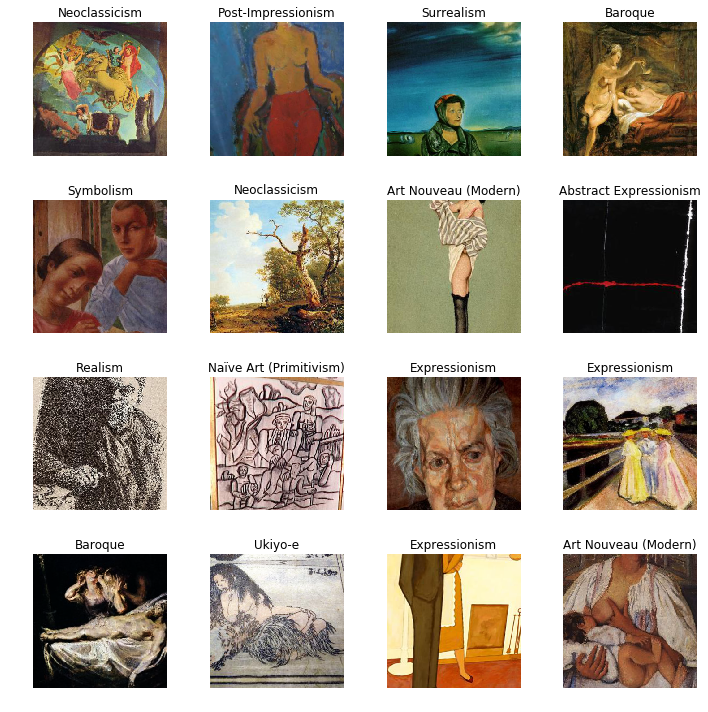

In [19]:
data.show_batch(rows=4, figsize=(10,10))

### Modelo basado en ResNet-50

Para llevar a cabo nuestra tarea, necesitamos elegir primero el tipo de red neuronal, y la arquitectura subyacente.

Nos basaremos en una red neuronal convolucional (**CNN**), debido a su rendimiento contrastado en clasificación de imágenes. Para la arquitectura no partiremos de cero, sino que usaremos un modelo pre-entrenado sobre ImageNet (un dataset con más de 1 millón de imágenes), que ya sabe reconocer muchas cosas. Más concretamente usaremos **ResNet-34** y **ResNet-50** (el nº hace referencia a las capas). Por tanto, estaremos aplicando lo aprendido con ImageNet a nuestra red (**Transfer Learning**), y la empezaremos a entrenar con las imágenes de pinturas, para obtener unos resultados a la altura del estado del arte, nunca mejor dicho.

Del uso de ResNet es de donde vienen los tamaños elegidos para nuestras imágenes; 224x224 (ResNet-34) y 299x299 (ResNet-50).

Para llevar a cabo el entrenamiento en **fastai** sólo tendremos que ejecutar unas líneas. Primero instanciaremos un `Learner` especializado en CNN, especificando la arquitectura base. En este apartado usaremos directamente ResNet-50:

In [20]:
learner = cnn_learner(data, models.resnet50, metrics=[error_rate])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:06<00:00, 15819306.42it/s]


A continuación usaremos la función `fit_one_cycle()` del Learner, para llevar a cabo el entrenamiento de nuestro modelo usando un algoritmo rapidísimo para arquitecturas complejas ([más](https://sgugger.github.io/the-1cycle-policy.html) sobre **1cycle**]). El parámetro principal es el número de *epochs* a ejecutar:

In [21]:
learner.fit_one_cycle(8, callbacks=[callbacks.SaveModelCallback(learner, every='improvement', mode='min',
                                                      monitor='error_rate', name='style-r50-stage-1')])

Better model found at epoch 0 with error_rate value: 0.590624988079071.
Better model found at epoch 1 with error_rate value: 0.5406249761581421.
Better model found at epoch 2 with error_rate value: 0.5231249928474426.
Better model found at epoch 3 with error_rate value: 0.5093749761581421.
Better model found at epoch 4 with error_rate value: 0.49687498807907104.
Better model found at epoch 5 with error_rate value: 0.46812498569488525.
Better model found at epoch 6 with error_rate value: 0.46562498807907104.
Better model found at epoch 7 with error_rate value: 0.4581249952316284.


Entrenando el modelo simplemente modificando las capas adicionales conseguimos un acierto del 54,19%. Pero esto es sólo la etapa 1; vamos a por la segunda.

In [0]:
#learner.load('style-r50-stage-1') # uncomment this if you want the best model
#learner.save('style-r50-stage-1') # uncomment this if you want the last model

Intentamos encontrar cuál es la tasa de aprendizaje para la siguiente etapa:

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


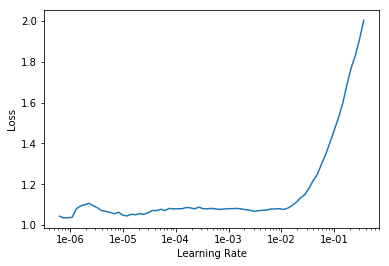

In [22]:
learner.lr_find()
learner.recorder.plot()

La idea en esta segunda etapa es *descongelar* los pesos de las capas pertenecientes a la arquitectura de partida, para volver a entrenar nuestro modelo completo. De esta forma podremos mejorar un poco más nuestro clasificador.

La clave está en elegir la tasa de aprendizaje máxima para las distintas capas del modelo. Con esta gráfica elegiremos basicamente la tasa máxima para las primeras capas (una tasa pequeña, ya que dichas capas no necesitan mucho ajuste). La tasa máxima para las últimas capas se suele elegir unas 10 veces menor que la elegida para la primera etapa (*3e-3* por defecto), teniendo en cuenta que nunca empeore el coste en la gráfica.

Descongelamos los pesos y volvemos a entrenar el modelo:

In [23]:
learner.load('style-r50-stage-1')
learner.unfreeze()
learner.fit_one_cycle(8, max_lr=slice(1e-6,3e-4), 
                      callbacks=[callbacks.SaveModelCallback(learner, every='improvement', mode='min',
                                                      monitor='error_rate', name='style-r50-stage-2')])

Better model found at epoch 0 with error_rate value: 0.46875.
Better model found at epoch 1 with error_rate value: 0.4543749988079071.
Better model found at epoch 2 with error_rate value: 0.453125.
Better model found at epoch 3 with error_rate value: 0.4437499940395355.
Better model found at epoch 4 with error_rate value: 0.4387499988079071.
Better model found at epoch 5 with error_rate value: 0.43187499046325684.


Vemos cómo llega un momento en que el coste de validación empieza a empeorar, y también el acierto del clasificador. Nos quedaremos con el modelo en ese punto (*epoch 5*). El acierto de nuestro clasificador se queda en un **56,19%**, que no está mal si tenemos en cuenta la dificultad de la tarea. ¡Desde luego que a mí me supera!

In [0]:
learner.load('style-r50-stage-2');

### Resultados

Vamos a interpretar los resultados de forma rápida usando un par de herramientas básicas.

Primero pintamos las decisiones más fallidas de nuestro clasificador:

In [0]:
interp = ClassificationInterpretation.from_learner(learner)
losses,idxs = interp.top_losses()

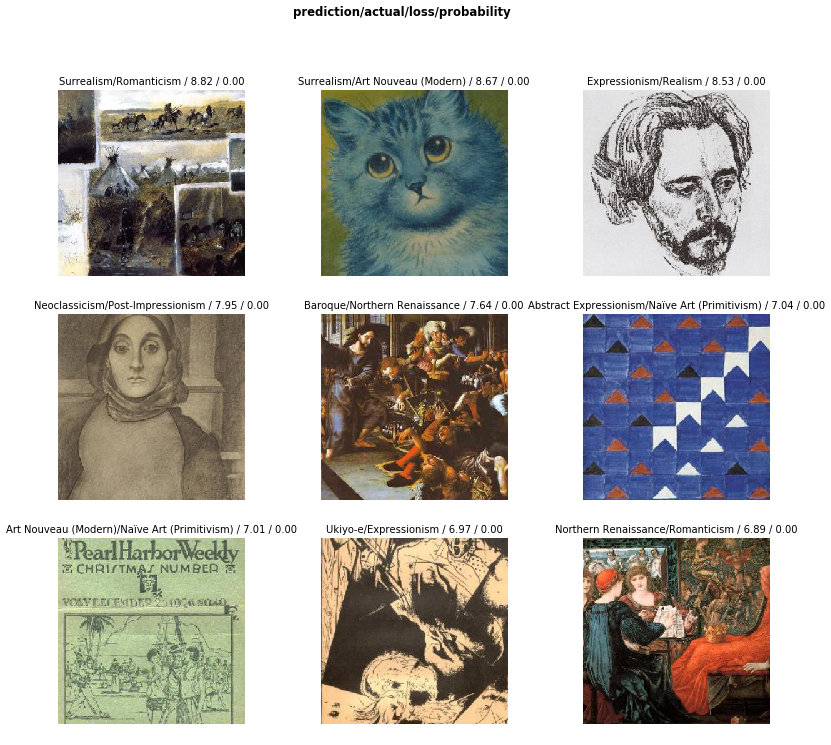

In [53]:
fig_top_losses = interp.plot_top_losses(9, heatmap=False, figsize=(16,14), return_fig=True)
fig_top_losses.dpi = 60

En estos ejemplos nuestro clasificador arrojó una probabilidad nula de que el estilo del cuadro fuera el que realmente es.

Pintamos la matriz de confusión para obtener una visión general de los errores:

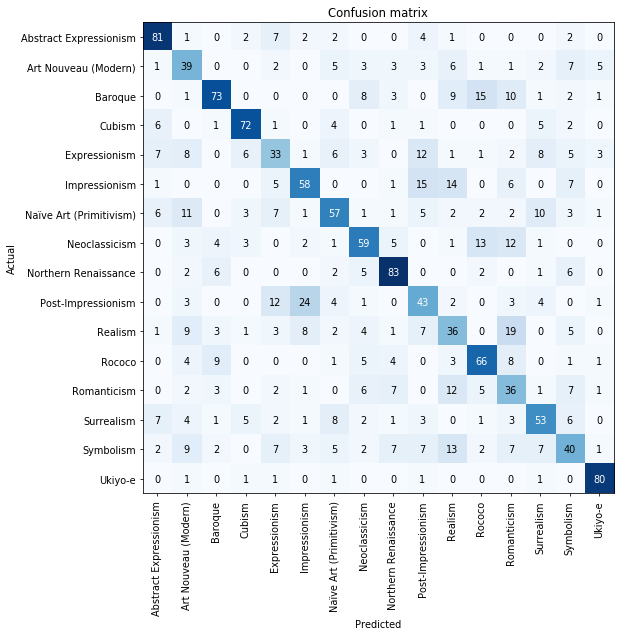

In [35]:
interp.plot_confusion_matrix(figsize=(9,9), dpi=70)

Con esta gráfica podemos observar dónde se está equivocando nuestro clasificador exactamente. 

Existen varios estilos donde falla con mucha frecuencia. Así a primera vista no me extraña para nada su confusión entre:
* Impresionismo, Post-Impresionismo y Expresionismo 
* Romanticismo y Realismo
* Barroco y Rococó

Es curioso, pero creo que coincido con la red neuronal en el estilo más sencillo de diferenciar: ¡el [Ukiyo-e](https://es.wikipedia.org/wiki/Ukiyo-e)!

Vamos a ver el ránking de categorías más equivocadas:

In [31]:
interp.most_confused(min_val=10)

[('Post-Impressionism', 'Impressionism', 24),
 ('Realism', 'Romanticism', 19),
 ('Baroque', 'Rococo', 15),
 ('Impressionism', 'Post-Impressionism', 15),
 ('Impressionism', 'Realism', 14),
 ('Neoclassicism', 'Rococo', 13),
 ('Symbolism', 'Realism', 13),
 ('Expressionism', 'Post-Impressionism', 12),
 ('Neoclassicism', 'Romanticism', 12),
 ('Post-Impressionism', 'Expressionism', 12),
 ('Romanticism', 'Realism', 12),
 ('Naïve Art (Primitivism)', 'Art Nouveau (Modern)', 11),
 ('Baroque', 'Romanticism', 10),
 ('Naïve Art (Primitivism)', 'Surrealism', 10)]

No es nada sencillo ubicar determinadas obras, y estoy seguro de que las personas que etiquetaron estos cuadros también tuvieron sus dudas al hacerlo. Igual que no se puede etiquetar toda la obra de un pintor en una sola categoría, la delimitación entre estilos no es tan clara como puede ser en otros ámbitos, y hay pinturas que podrían perfectamente encajar bajo más de una etiqueta.

Aún así los resultados conseguidos (56,19% de acierto) son muy buenos, comparando con lo que se consideraba *estado-del-arte* hace muy poco tiempo ([2015](https://arxiv.org/pdf/1505.00855.pdf), [2016](http://cs-chan.com/doc/ICIP2016.pdf)), y relativamente cerca de un proyecto similar más reciente ([2017](https://www.lamsade.dauphine.fr/~bnegrevergne/webpage/documents/2017_rasta.pdf)). Nuestros resultados son aún más valiosos teniendo en cuenta que no hemos hecho gran cosa para mejorar los datos de entrada, y prácticamente nada para modelar la red en sí misma (aunque esto es mérito de la librería fastai en particular, y del campo de la investigación en general).

Seguramente se podrían mejorar los resultados usando más imágenes, recortes de las mismas, unas categorías más generalistas, otras transformaciones que no sean las de por defecto, etc. Pero no era el propósito de este proyecto.

Y después de comprobar lo complicado que resulta asignar un cuadro a un estilo determinado... ¿Qué tal si probamos ahora con nuestra intención inicial de reconocer al autor de una obra? En ese caso la etiqueta o variable dependiente no será tan subjetiva :)

## Reconocimiento del autor de la obra

### Preprocesado de los datos

Para esta tarea vamos a usar sólo los artistas con más de 300 pinturas en el dataset, de forma que tengamos muestras suficientes para entrenar nuestra red. Esta vez vamos a optar por no hacer nada con respecto al desbalanceo entre el número de cuadros por pintor.

NOTA: el número escogido no es casual; se eligió para comparar con un proyecto similar.



In [55]:
artist_counts = df['artist'].value_counts()
artist_labels = artist_counts[artist_counts > 300].keys().to_list()
print(len(artist_labels), artist_labels)

57 ['Rembrandt', 'Ivan Aivazovsky', 'Ilya Repin', 'John Singer Sargent', 'Gustave Dore', 'Pablo Picasso', 'Marc Chagall', 'Ivan Shishkin', 'Albrecht Durer', 'Giovanni Battista Piranesi', 'Zdislav Beksinski', 'Pierre-Auguste Renoir', 'Paul Cezanne', 'Martiros Saryan', 'Camille Pissarro', 'Pyotr Konchalovsky', 'Boris Kustodiev', 'Paul Gauguin', 'Claude Monet', 'Raphael Kirchner', 'Eugene Boudin', 'Nicholas Roerich', 'Henri Matisse', 'Edgar Degas', 'Vincent van Gogh', 'Childe Hassam', 'Camille Corot', 'Theophile Steinlen', 'Salvador Dali', 'Alfred Sisley', 'Odilon Redon', 'Isaac Levitan', 'Fernand Leger', 'James Tissot', 'Eyvind Earle', 'Zinaida Serebriakova', 'Henri Martin', 'Ernst Ludwig Kirchner', 'Francisco Goya', 'Maurice Prendergast', 'Peter Paul Rubens', 'Henri de Toulouse-Lautrec', 'Konstantin Makovsky', 'Erte', 'William Merritt Chase', 'David Burliuk', 'Rene Magritte', 'Theodor Severin Kittelsen', 'Utagawa Kuniyoshi', 'Max Ernst', 'Amedeo Modigliani', 'M.C. Escher', 'Albert Biers

Imprimimos la lista de autores y el número de obras de cada uno:

In [56]:
df.groupby('artist')['size_bytes'] \
        .aggregate(['count']) \
        .sort_values(by=['count'], ascending=False).query('count > 300')

count
artist                           
John Singer Sargent           500
Rembrandt                     500
Pablo Picasso                 500
Ivan Shishkin                 500
Ivan Aivazovsky               500
Giovanni Battista Piranesi    500
Gustave Dore                  500
Pierre-Auguste Renoir         500
Ilya Repin                    500
Marc Chagall                  500
Albrecht Durer                500
Zdislav Beksinski             500
Pyotr Konchalovsky            499
Martiros Saryan               499
Paul Cezanne                  499
Camille Pissarro              499
Claude Monet                  498
Boris Kustodiev               498
Paul Gauguin                  498
Raphael Kirchner              497
Nicholas Roerich              496
Eugene Boudin                 496
Henri Matisse                 495
Edgar Degas                   495
Vincent van Gogh              494
Childe Hassam                 493
Camille Corot                 488
Theophile Steinlen            485
Salvador Dali                 485
Alfred Sisley                 464
Odilon Redon                  451
Isaac Levitan                 449
Fernand Leger                 437
James Tissot                  427
Eyvind Earle                  422
Zinaida Serebriakova          412
Henri Martin                  405
Ernst Ludwig Kirchner         388
Francisco Goya                386
Maurice Prendergast           379
Peter Paul Rubens             375
Henri de Toulouse-Lautrec     369
Konstantin Makovsky           364
Erte                          364
William Merritt Chase         363
David Burliuk                 360
Rene Magritte                 358
Theodor Severin Kittelsen     351
Utagawa Kuniyoshi             347
Max Ernst                     344
Amedeo Modigliani             342
M.C. Escher                   335
Albert Bierstadt              322
Sam Francis                   321
Konstantin Korovin            315
Felix Vallotton               305
Mary Cassatt                  302

In [59]:
df_artists = df.query('artist in @artist_labels')
len(df_artists)

24871

Usamos de nuevo `ImageDataBunch` y su método `from_df()` para crear los subconjuntos de entrenamiento y validación. Esta vez vamos a usar como tamaño 224x224 de cara a usar **ResNet-34**:

In [60]:
data = ImageDataBunch.from_df(df=df_artists, path=pictures_dir, 
                              label_col='artist', fn_col='new_filename',
                              ds_tfms=get_transforms(), size=224, bs=48
                              ).normalize(imagenet_stats)
data

ImageDataBunch;

Train: LabelList (19897 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Ivan Aivazovsky,Gustave Dore,Gustave Dore,Gustave Dore,Utagawa Kuniyoshi
Path: /root/.fastai/data/pictures;

Valid: LabelList (4974 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Gustave Dore,Raphael Kirchner,Konstantin Korovin,Ilya Repin,Peter Paul Rubens
Path: /root/.fastai/data/pictures;

Test: None

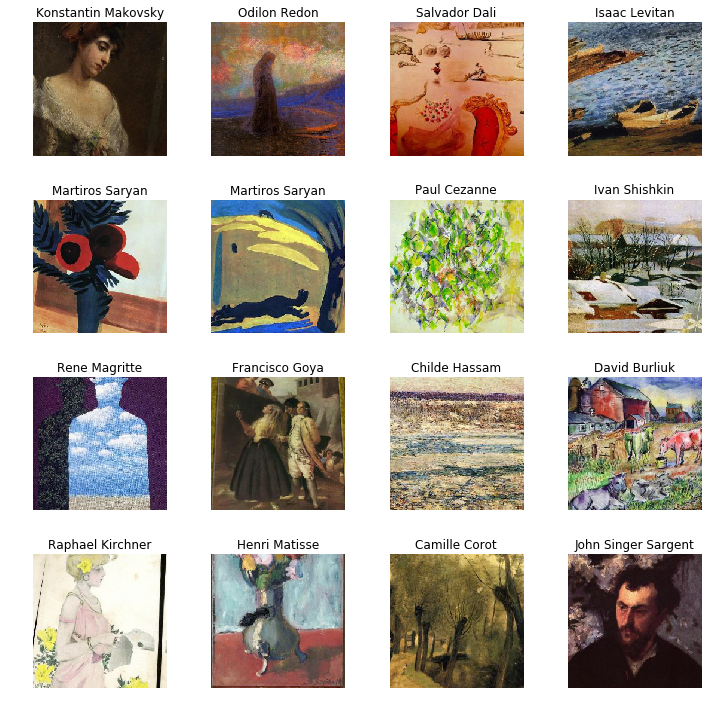

In [61]:
data.show_batch(rows=4, figsize=(10,10))

Comprobamos el número de autores:

In [0]:
data.c 

57

### Modelo basado en ResNet-34

Vamos a probar con la arquitectura **ResNet-34**, debido a que es una arquitectura más liviana. Luego probaremos también con ResNet-50, para comparar resultados y tiempos. 

Seguimos los mismos pasos que dimos en el entrenamiento del clasificador por estilo. Vamos primero con la etapa 1:

In [62]:
learner = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 71840329.87it/s]


In [63]:
learner.fit_one_cycle(4, callbacks=[callbacks.SaveModelCallback(learner, every='improvement', mode='min',
                                                      monitor='error_rate', name='author-r34-stage-1')])

Better model found at epoch 0 with error_rate value: 0.4853236973285675.
Better model found at epoch 1 with error_rate value: 0.3988741338253021.
Better model found at epoch 2 with error_rate value: 0.3453960716724396.
Better model found at epoch 3 with error_rate value: 0.3361479640007019.


In [0]:
#learner.load('author-r34-stage-1')

Vamos ahora con la etapa 2:

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


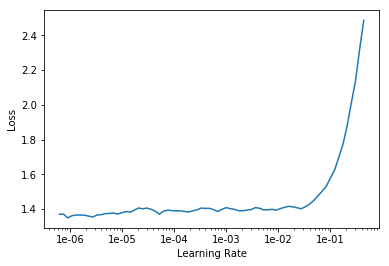

In [70]:
learner.lr_find()
learner.recorder.plot()

Como tasa máxima de aprendizaje para las primeras capas elegiremos un punto donde comience la mayor pendiente negativa en la función de coste (2e-5). Siempre hay que tener cuidado de que no sea demasiado grande (algo que notaremos rapidamente si el coste de entrenamiento y el de validación aumentan).

Probamos:

In [72]:
learner.unfreeze()
learner.fit_one_cycle(3, max_lr=slice(2e-5,3e-4), 
                      callbacks=[callbacks.SaveModelCallback(learner, 
                                 every='improvement', mode='min', 
                                 monitor='error_rate', name='author-r34-stage-2')])

Better model found at epoch 0 with error_rate value: 0.304784893989563.
Better model found at epoch 1 with error_rate value: 0.25693607330322266.
Better model found at epoch 2 with error_rate value: 0.24065138399600983.


Obtenemos una tasa de acierto del 75,94%. No vamos a entretenernos más aquí; vamos de nuevo a por ResNet-50.

### Modelo basado en ResNet-50

Repetimos el proceso con la arquitectura de 50 capas, lo que a priori nos proporcionará mejores resultados por ser más grande.

Ahora usaremos imágenes con un tamaño de 299x299:

In [0]:
data = ImageDataBunch.from_df(df=df_artists, path=pictures_dir, 
                              label_col='artist', fn_col='new_filename',
                              ds_tfms=get_transforms(), size=299, bs=48
                              ).normalize(imagenet_stats)

Seguimos los mismos pasos de siempre:

In [0]:
learner = cnn_learner(data, models.resnet50, metrics=error_rate)

In [76]:
learner.fit_one_cycle(6, callbacks=[callbacks.SaveModelCallback(learner, every='improvement', mode='min',
                                                      monitor='error_rate', name='author-r50-stage-1')])

Better model found at epoch 0 with error_rate value: 0.41234418749809265.
Better model found at epoch 1 with error_rate value: 0.3556493818759918.
Better model found at epoch 2 with error_rate value: 0.3136308789253235.
Better model found at epoch 3 with error_rate value: 0.27201446890830994.
Better model found at epoch 4 with error_rate value: 0.25432246923446655.
Better model found at epoch 5 with error_rate value: 0.24487334489822388.


In [0]:
#learner.save('author-r50-stage-1')

Ya estamos rozando los resultados de ResNet-34. 

Vamos con la segunda etapa. Primero elegimos la tasa de aprendizaje máxima para las distintas capas:

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


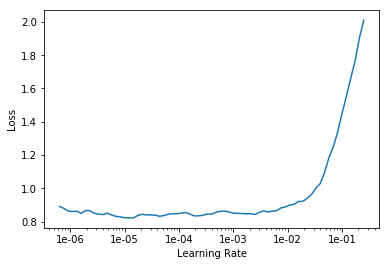

In [78]:
learner.lr_find()
learner.recorder.plot()

Descongelamos los pesos de las primeras capas y entrenamos el modelo completo:

In [79]:
learner.unfreeze()
learner.fit_one_cycle(4, max_lr=slice(1e-6,3e-4), 
                      callbacks=[callbacks.SaveModelCallback(learner, 
                                 every='improvement', mode='min',
                                 monitor='error_rate', name='author-r50-stage-2')])

Better model found at epoch 0 with error_rate value: 0.2472858875989914.
Better model found at epoch 1 with error_rate value: 0.22617611289024353.
Better model found at epoch 2 with error_rate value: 0.21632489562034607.
Better model found at epoch 3 with error_rate value: 0.21431443095207214.


Elegimos una tasa de aprendizaje máxima distinta para las últimas capas, ya que aparentemente según la gráfica podemos ir más rápido:

In [81]:
learner.load('author-r50-stage-1')
learner.unfreeze()
learner.fit_one_cycle(3, max_lr=slice(1e-6,2e-3), 
                      callbacks=[callbacks.SaveModelCallback(learner, 
                                 every='improvement', mode='min',
                                 monitor='error_rate', name='author-r50-stage-2-b')])

Better model found at epoch 0 with error_rate value: 0.26578205823898315.
Better model found at epoch 1 with error_rate value: 0.21773220598697662.
Better model found at epoch 2 with error_rate value: 0.2044631987810135.


El acierto ha mejorado en 1 punto porcentual, lo que no es poco. Nos quedamos con este modelo que nos proporciona un acierto del **79,55%**; un 3,5% más que ResNet-34 ¡WOW! aunque eso sí, doblando el tiempo de entrenamiento.

### Resultados

Vamos a interpretar los resultados de nuestro clasificador por artista. Directamente nos vamos a la matriz de confusión:

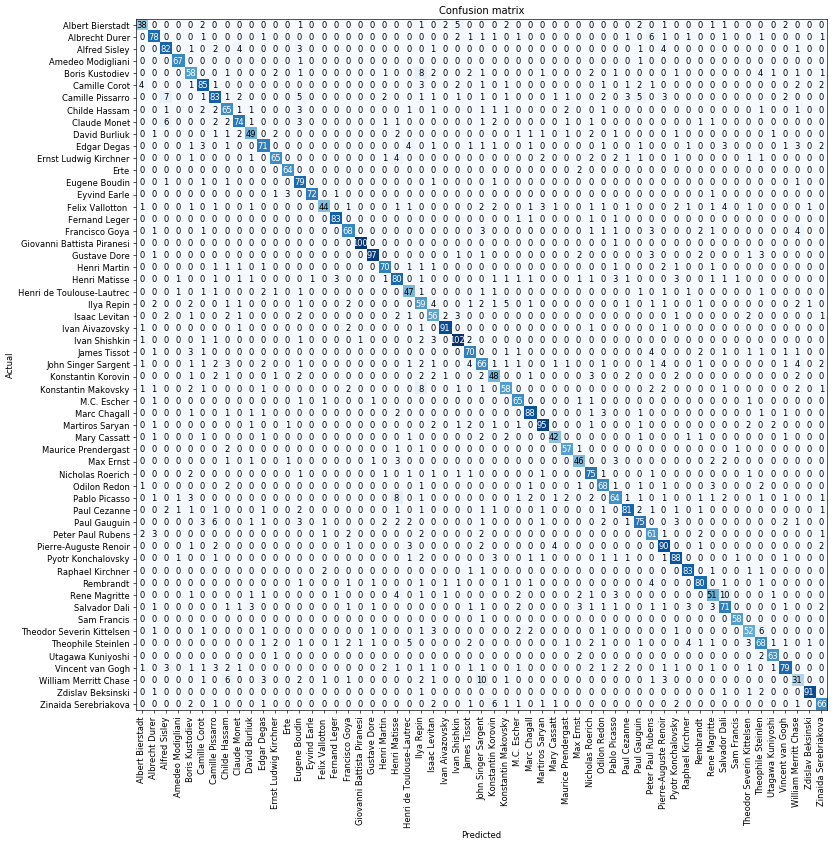

In [82]:
interp = ClassificationInterpretation.from_learner(learner)
losses,idxs = interp.top_losses()
interp.plot_confusion_matrix(figsize=(14,14), dpi=60)

Parece que no hay tantas equivocaciones sangrantes como en el caso del clasificador por estilo. Veamos el ránking de confusiones:

In [83]:
interp.most_confused(min_val=5)

[('Rene Magritte', 'Salvador Dali', 10),
 ('William Merritt Chase', 'John Singer Sargent', 10),
 ('Boris Kustodiev', 'Ilya Repin', 8),
 ('Konstantin Makovsky', 'Ilya Repin', 8),
 ('Pablo Picasso', 'Henri Matisse', 8),
 ('Camille Pissarro', 'Alfred Sisley', 7),
 ('Albrecht Durer', 'Peter Paul Rubens', 6),
 ('Claude Monet', 'Alfred Sisley', 6),
 ('Paul Gauguin', 'Camille Pissarro', 6),
 ('Theodor Severin Kittelsen', 'Theophile Steinlen', 6),
 ('William Merritt Chase', 'Childe Hassam', 6),
 ('Zinaida Serebriakova', 'Konstantin Korovin', 6),
 ('Albert Bierstadt', 'Ivan Shishkin', 5),
 ('Camille Pissarro', 'Eugene Boudin', 5),
 ('Camille Pissarro', 'Paul Gauguin', 5),
 ('Ilya Repin', 'Konstantin Makovsky', 5),
 ('Theophile Steinlen', 'Henri de Toulouse-Lautrec', 5)]

Podemos observar como las 2 mayores confusiones de la red son:
 * Magritte y Dali: ambos representantes del Surrealismo, un estilo bastante particular.
 * Chase y Sargent: pertenecientes al Impresionismo, con temáticas similares.
 
Luego tenemos varios artistas que la red confunde entre sí... Pissarro, Sisley, Monet, Gauguin o Boudin. ¡Otra vez el impresionismo! ¿o es el "post-impresionismo"? :)

¿Y qué pasa con Monet y Boudin en concreto? pues que nuestro clasificador ha registrado solamente 3 confusiones entre ambos.

De nuevo vemos que no es nada sencillo identificar al autor de determinadas obras, habiendo pintores de la misma época con el mismo estilo e incluso pintando los mismos paisajes. Lo bueno de este caso es que las etiquetas utilizadas son más objetivas que en el caso de los estilos (a no ser que empecemos a hablar de dudosas asignaciones de autoría...).

Los resultados conseguidos (79,5% de acierto) son excelentes, comparando de nuevo con el *estado-del-arte* en [2016](http://cs-chan.com/doc/ICIP2016.pdf) o [2017](http://cs231n.stanford.edu/reports/2017/pdfs/406.pdf), y teniendo de nuevo en cuenta que prácticamente lo hemos dejado todo en manos de la librería fastai.

De nuevo podemos pensar en que se podrían mejorar algo los resultados usando más imágenes y recortes, u otras transformaciones diferentes.





¡Que no se nos olvide! Finalmente exportamos el modelo :)

In [0]:
learner.export(file='../author-r50-stage-2-b.pkl')

## Monet o Boudin?

¿Y si hacemos un clasificador específico para diferenciar solamente cuadros de estos 2 pintores? `¿mejorarán los resultados? `Vamos a comprobarlo.

In [94]:
artist_labels = ['Claude Monet', 'Eugene Boudin']
df_imp = df.query('artist in @artist_labels')
len(df_imp)

994

In [0]:
data = ImageDataBunch.from_df(df=df_imp, path=pictures_dir, 
                              label_col='artist', fn_col='new_filename',
                              ds_tfms=get_transforms(), size=299, bs=48
                              ).normalize(imagenet_stats)

Aquí una pequeña muestra del problema al que nos estamos enfrentando. ¿Fácil?

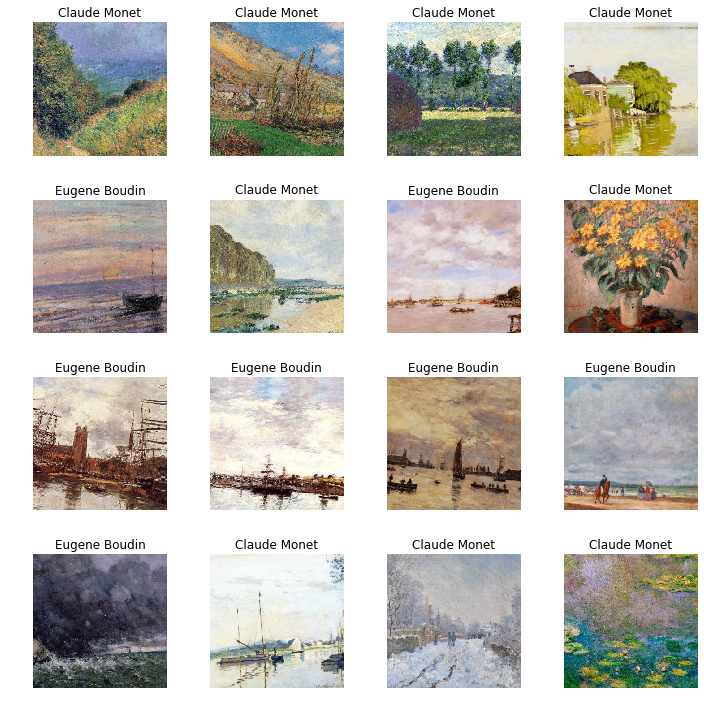

In [96]:
data.show_batch(rows=4, figsize=(10,10))

Vamos de nuevo con el entrenamiento:

In [0]:
learner = cnn_learner(data, models.resnet50, metrics=error_rate)

In [98]:
learner.fit_one_cycle(8, callbacks=[callbacks.SaveModelCallback(learner, 
                                 every='improvement', mode='min',
                                 monitor='error_rate', name='impres-r50-stage-1')])

Better model found at epoch 0 with error_rate value: 0.08585856854915619.
Better model found at epoch 1 with error_rate value: 0.05050504952669144.
Better model found at epoch 2 with error_rate value: 0.04040403664112091.
Better model found at epoch 3 with error_rate value: 0.035353533923625946.
Better model found at epoch 4 with error_rate value: 0.03030300699174404.
Better model found at epoch 7 with error_rate value: 0.025252506136894226.


Interpretamos los resultados de la etapa 1, para depurar cómo está funcionando nuestro modelo en este punto, y como mejorará una vez pasemos la etapa 2:

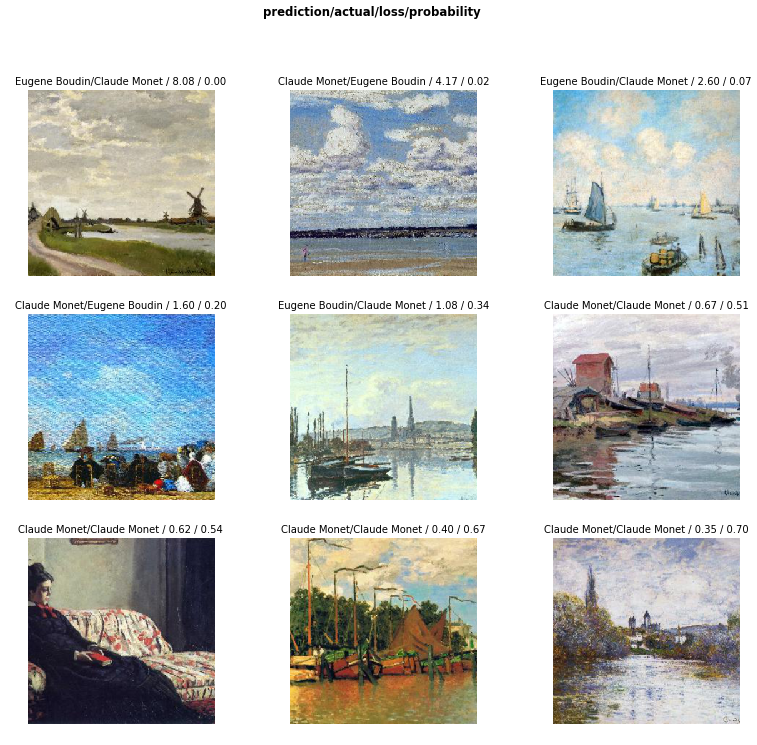

In [99]:
interp = ClassificationInterpretation.from_learner(learner)
losses,idxs = interp.top_losses()
fig_top_losses = interp.plot_top_losses(9, heatmap=False, figsize=(16,14), return_fig=True)
fig_top_losses.dpi = 60

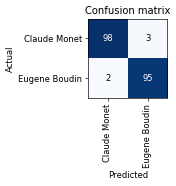

In [100]:
interp.plot_confusion_matrix(figsize=(3,3), dpi=60)

Pues de momento se equivoca en sólo 5 cuadros (de un total de 198).

Vamos con la etapa 2:

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


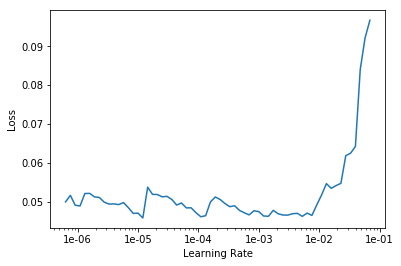

In [101]:
learner.lr_find()
learner.recorder.plot()

In [108]:
learner.load('impres-r50-stage-1')
learner.unfreeze()
learner.fit_one_cycle(4, max_lr=slice(7e-7,3e-4), 
                      callbacks=[callbacks.SaveModelCallback(learner, 
                                 every='improvement', mode='min',
                                 monitor='error_rate', name='impres-r50-stage-2')])

Better model found at epoch 0 with error_rate value: 0.025252506136894226.
Better model found at epoch 2 with error_rate value: 0.015151504427194595.


Veamos los resultados:

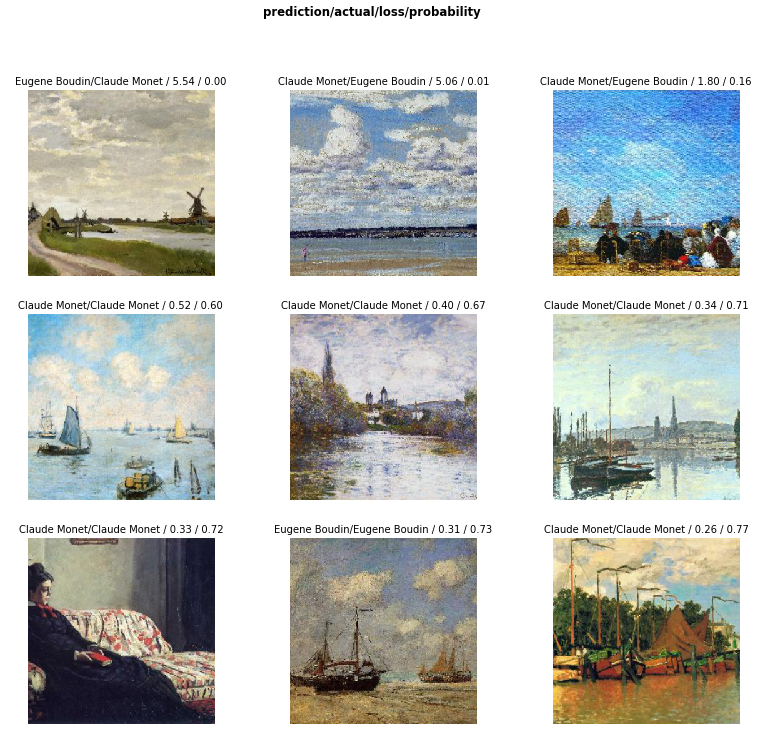

In [109]:
interp = ClassificationInterpretation.from_learner(learner)
losses,idxs = interp.top_losses()
fig_top_losses = interp.plot_top_losses(9, heatmap=False, figsize=(16,14), return_fig=True)
fig_top_losses.dpi = 60

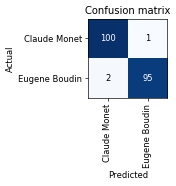

In [110]:
interp.plot_confusion_matrix(figsize=(3,3), dpi=60)

¡Hemos pasado a cometer sólo 3 errores! lo que supone un **98,48%** de acierto. También es verdad que nuestro clasificador estaba muy seguro de su decisión en los 2 primeros errores que vemos. Aquí podríamos seguir rascando para intentar comprender el motivo.

En fin! mejor no os cuento los fallos que cometí yo en mi visita a su exposición conjunta.... Y eso que yo estaba viendo los cuadros en todo su esplendor y no una triste miniatura :)

## Conclusiones

La aproximación utilizada para crear nuestro clasificador funciona muy bien y devuelve grandes resultados (mejorando incluso proyectos relativamente recientes); sin la necesidad de contar con una gran máquina (Google Colab, instancia gratuita) ni con mucho tiempo (se puede ver lo que tardó cada entrenamiento).

El uso de **fastai** supone un gran avance en el campo de Deep Learning. Reduce nuestro desarrollo a muy pocas líneas (en comparación con lo que nos costaría en PyTorch) y pone a nuestra disposición tanto las arquitecturas más usadas como los métodos más avanzados.



## Futuras líneas de trabajo

Existen varias posibilidades para ampliar el ámbito de este proyecto. Entre ellas:
 * Creación de una API donde se puedan enviar imágenes de cuadros para obtener una predicción de su autor.
 * Comparación con otras arquitecturas, o con otras versiones de ResNet que usan más capas.
 * Prueba de otras transformaciones, teniendo en cuenta nuestro caso en particular.
 * Uso de recortes para que la red neuronal pueda ver cosas como la pincelada o los materiales usados. En realidad son 2 parámetros esenciales para nosotros.